Solved parameters for NPV(r) = A*exp(-B*r) + C:
  A = 1429.278
  B = 4.924
  C = -717.374


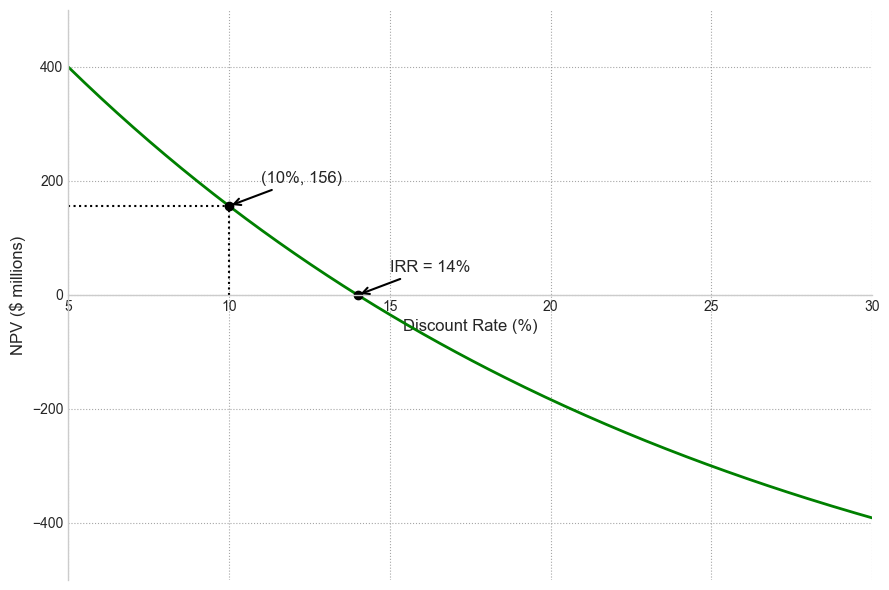

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp
from scipy.optimize import fsolve

# ------------------------------------------------------
# 1) Define anchor points for the NPV curve (in decimals)
#    We'll force: NPV(5%)=400, NPV(14%)=0 (IRR=14%), NPV(25%)=-300
# ------------------------------------------------------
def residuals(vars):
    A, B, C = vars
    eq1 = A * exp(-B * 0.05) + C - 400
    eq2 = A * exp(-B * 0.14) + C - 0
    eq3 = A * exp(-B * 0.25) + C + 300
    return [eq1, eq2, eq3]

initial_guess = [500, 5, -100]  # just a guess for (A, B, C)
solution = fsolve(residuals, initial_guess)
A, B, C = solution

print("Solved parameters for NPV(r) = A*exp(-B*r) + C:")
print(f"  A = {A:.3f}")
print(f"  B = {B:.3f}")
print(f"  C = {C:.3f}")

# Define the NPV function using the solved parameters
def npv(r):
    return A * np.exp(-B * r) + C

# ------------------------------------------------------
# 2) Create a smooth range of discount rates (5% to 30%)
# ------------------------------------------------------
r_vals = np.linspace(0.05, 0.30, 200)
npv_vals = [npv(r) for r in r_vals]

# ------------------------------------------------------
# 3) Plot
# ------------------------------------------------------
fig, ax = plt.subplots(figsize=(9, 6))

# Plot the curve: x-axis in %; y-axis is NPV
ax.plot(r_vals * 100, npv_vals, color='green', linewidth=2)

# Remove the default bottom spine and move it to y=0
# so the x-axis is drawn at NPV=0.
ax.spines['bottom'].set_position(('data', 0))  # place bottom spine at y=0
ax.spines['bottom'].set_bounds(5, 30)          # show spine only between x=5% and x=30%
ax.spines['top'].set_visible(False)            # hide top border
ax.spines['right'].set_visible(False)          # hide right border
ax.xaxis.set_ticks_position('bottom')          # ticks on the moved spine
ax.xaxis.set_label_position('bottom')          # label on the moved spine

# Set the chart limits:
ax.set_xlim(5, 30)
ax.set_ylim(-500, 500)

ax.set_xlabel('Discount Rate (%)', fontsize=12)    
ax.set_ylabel('NPV ($ millions)', fontsize=12)

# ------------------------------------------------------
# 4) Annotate the IRR at 14% (no dotted lines for it)
# ------------------------------------------------------
r_14 = 14
npv_14 = 0  # by construction
# Place a marker & arrow annotation
ax.plot(r_14, npv_14, 'ko')
ax.annotate(
    'IRR = 14%',
    xy=(r_14, npv_14),
    xytext=(r_14 + 1, npv_14 + 40),
    arrowprops=dict(arrowstyle='->', lw=1.5),
    fontsize=12
)

# ------------------------------------------------------
# 5) Mark 10% with dotted lines to the axes
# ------------------------------------------------------
r_10 = 10
npv_10 = npv(r_10 / 100.0)  # note: r_10 is in %, so convert to decimal
ax.plot(r_10, npv_10, 'ko') # black circle at (10%, NPV)
ax.annotate(
    f'(10%, {npv_10:.0f})',
    xy=(r_10, npv_10),
    xytext=(r_10 + 1, npv_10 + 40),
    arrowprops=dict(arrowstyle='->', lw=1.5),
    fontsize=12
)

# Dotted line from (10, 0) to (10, npv_10)
ax.plot([r_10, r_10], [0, npv_10], linestyle=':', color='black')
# Dotted line from (0, npv_10) to (10, npv_10)
# (But the "x=0" might not be in our visible range, so let's do from x=5 to 10)
ax.plot([5, r_10], [npv_10, npv_10], linestyle=':', color='black')

# Optional grid
ax.grid(True, linestyle=':', color='gray', alpha=0.7)

plt.tight_layout()
plt.show()
